In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

from scipy.fft import fft

In [2]:
# Prepare data
N = 12
x = np.arange(N)
print('x', x)

X = fft(x)
# print('X', X)

for i in range(len(X)):
    print(f'X[{i}] = {X[i]}')

x [ 0  1  2  3  4  5  6  7  8  9 10 11]
X[0] = (66-0j)
X[1] = (-6.000000000000001+22.392304845413264j)
X[2] = (-6+10.392304845413264j)
X[3] = (-6+6j)
X[4] = (-6+3.4641016151377553j)
X[5] = (-5.999999999999999+1.607695154586736j)
X[6] = (-6-0j)
X[7] = (-5.999999999999999-1.607695154586736j)
X[8] = (-6-3.4641016151377553j)
X[9] = (-6-6j)
X[10] = (-6-10.392304845413264j)
X[11] = (-6.000000000000001-22.392304845413264j)


In [3]:
# Code from https://www.audiolabs-erlangen.de/resources/MIR/PCP/PCP_06_complex.html

def plot_polar_vector(c, label=None, color=None, start=0, linestyle='-'):
    """Plot arrow in polar plot

    Notebook: PCP_06_complex.ipynb

    Args:
        c: Complex number
        label: Label of arrow (Default value = None)
        color: Color of arrow (Default value = None)
        start: Complex number encoding the start position (Default value = 0)
        linestyle: Linestyle of arrow (Default value = '-')
    """
    # plot line in polar plane
    line = plt.polar([np.angle(start), np.angle(c)], [np.abs(start), np.abs(c)], label=label,
                     color=color, linestyle=linestyle)
    # plot arrow in same color
    this_color = line[0].get_color() if color is None else color
    plt.annotate('', xytext=(np.angle(start), np.abs(start)), xy=(np.angle(c), np.abs(c)),
                 arrowprops=dict(facecolor=this_color, edgecolor='none',
                                 headlength=12, headwidth=10, shrink=1, width=0))

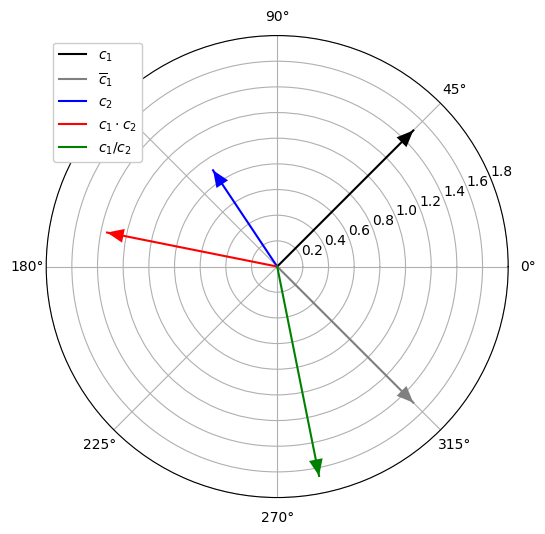

In [4]:
c_abs = 1.5
c_angle = 45  # in degree
c_angle_rad = np.deg2rad(c_angle) 
a = c_abs * np.cos(c_angle_rad)
b = c_abs * np.sin(c_angle_rad)
c1 = a + b*1j    
c2 = -0.5 + 0.75*1j

plt.figure(figsize=(6, 6))
plot_polar_vector(c1, label='$c_1$', color='k')
plot_polar_vector(np.conj(c1), label='$\overline{c}_1$', color='gray')
plot_polar_vector(c2, label='$c_2$', color='b')
plot_polar_vector(c1*c2, label='$c_1\cdot c_2$', color='r')
plot_polar_vector(c1/c2, label='$c_1/c_2$', color='g')

plt.ylim([0, 1.8]);
plt.legend(framealpha=1);

In [4]:
# Define color palette
color_palette = ['k', 'r', 'g', 'b', 'm', 'c']

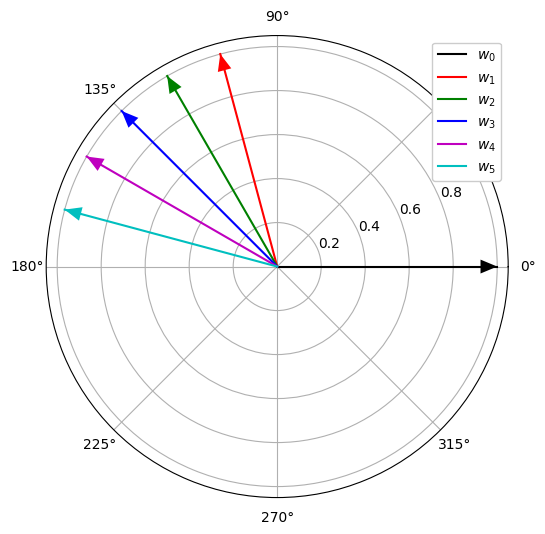

In [7]:
# Plot the first 6 frequency components
plt.figure(figsize=(6, 6))

for i in range(6):
    w = X[i]
    w_unit = w / np.abs(w)
    if i == 0:
        plot_polar_vector(w_unit, label=f'$w_{i}$', color=color_palette[i])
    else:
        plot_polar_vector(w_unit, label=f'$w_{i}$', color=color_palette[i])

plt.legend(framealpha=1)

plt.savefig('w0-w5.svg')
plt.savefig('w0-w5.pdf')

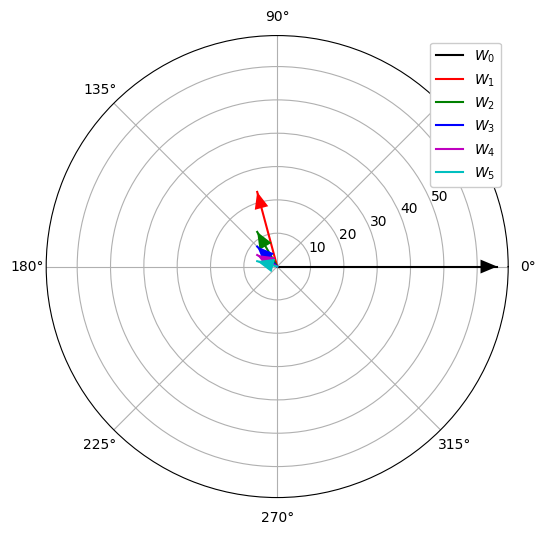

In [15]:
# plot unnomralized frequency components
plt.figure(figsize=(6, 6))

for i in range(6):
    w = X[i]
    plot_polar_vector(w, label=f'$W_{i}$', color=color_palette[i])

plt.legend(framealpha=1)

plt.savefig('w0-w5_origin.svg')
plt.savefig('w0-w5_origin.pdf')

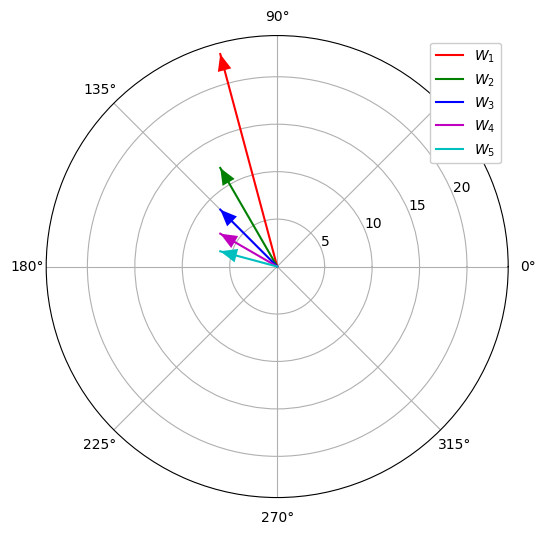

In [6]:
# Plot w1 to w5 (excluding w0)
plt.figure(figsize=(6, 6))

for i in range(1, 6):
    w = X[i]
    plot_polar_vector(w, label=f'$W_{i}$', color=color_palette[i])

plt.legend(framealpha=1)
plt.savefig('w1-w5_origin.svg')
plt.savefig('w1-w5_origin.pdf')

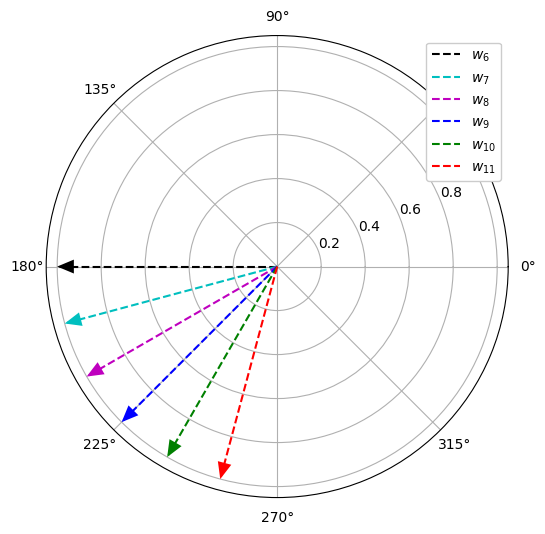

In [16]:
# Plot the conjugated Xs, i.e. the negative frequencies
plt.figure(figsize=(6, 6))

for i in range(6, 12):
    w = X[i]
    w_unit = w / np.abs(w)
    plot_polar_vector(w_unit, label=f'$w_{{{i}}}$', color=color_palette[6-i], linestyle='--')

plt.legend(framealpha=1)
plt.savefig('w6-w11.svg')
plt.savefig('w6-w11.pdf')

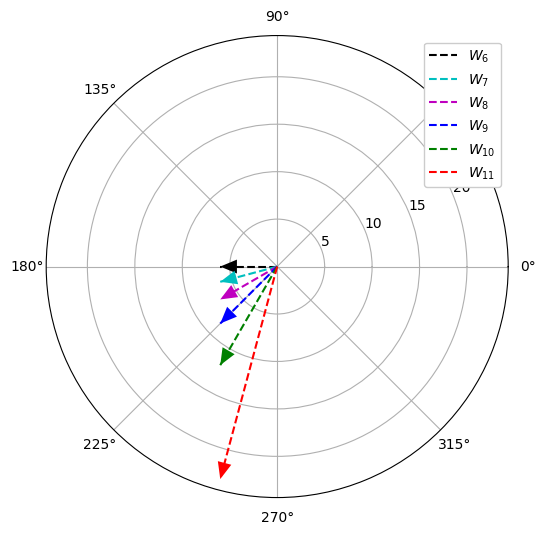

In [5]:
# plot unnomralized frequency components
plt.figure(figsize=(6, 6))

for i in range(6, 12):
    w = X[i]
    plot_polar_vector(w, label=f'$W_{{{i}}}$', color=color_palette[6-i], linestyle='--')

plt.legend(framealpha=1)
plt.savefig('w6-w11_origin.svg')
plt.savefig('w6-w11_origin.pdf')

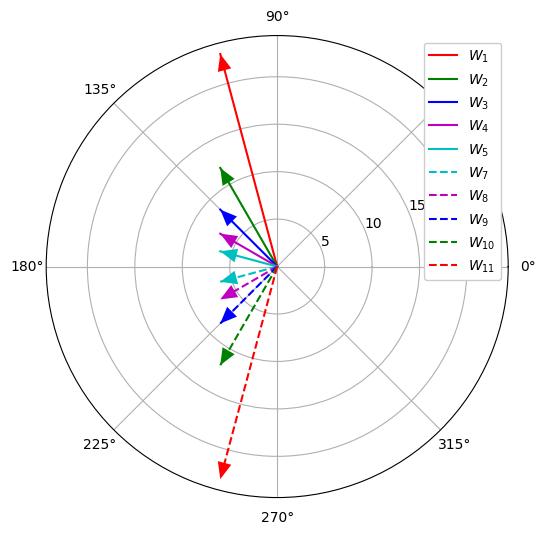

In [8]:
# Plot w1 to w5, and w7 to w11 in one figure (excluding w0 and w6)
plt.figure(figsize=(6, 6))

for i in range(1, 6):
    w = X[i]
    plot_polar_vector(w, label=f'$W_{i}$', color=color_palette[i])

for i in range(7, 12):
    w = X[i]
    plot_polar_vector(w, label=f'$W_{{{i}}}$', color=color_palette[6-i], linestyle='--')

plt.legend(framealpha=1)
plt.savefig('w1-w11_origin.svg')
plt.savefig('w1-w11_origin.pdf')

In [4]:
X1_norm = np.abs(X[1])
X1_norm2 = np.sqrt(X[1].real**2 + X[1].imag**2)
assert(np.equal(X1_norm, X1_norm2))
print(f'|X1| = {X1_norm}')

|X1| = 23.18221983093764


In [12]:
# gen latex for |X1| through |X5|
for i in range(1, 6):
    X_norm = np.abs(X[i])
    print(f'|X_{i}| = \sqrt{{{X[i].real:.2f}^2 + {X[i].imag:.2f}^2}} = {X_norm:.2f}')

|X_1| = \sqrt{-6.00^2 + 22.39^2} = 23.18
|X_2| = \sqrt{-6.00^2 + 10.39^2} = 12.00
|X_3| = \sqrt{-6.00^2 + 6.00^2} = 8.49
|X_4| = \sqrt{-6.00^2 + 3.46^2} = 6.93
|X_5| = \sqrt{-6.00^2 + 1.61^2} = 6.21


/var/folders/yd/ws_jl2q562n6y2j72vz99j_r0000gn/T/ipykernel_32137/2070301465.py:8: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(xf, np.abs(X[:6]), use_line_collection=False)


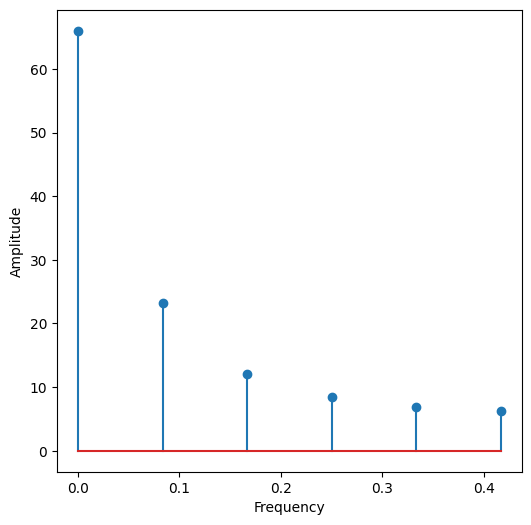

In [18]:
# Plot amplitude spectrum of X0 to X5
from scipy.fft import fftfreq

plt.figure(figsize=(6, 6))
# plt.stem(np.abs(X[:6]), use_line_collection=True)

xf = fftfreq(N)[:6]
plt.stem(xf, np.abs(X[:6]), use_line_collection=False)
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.savefig('X0-X5_ampSpectrum.svg')
plt.savefig('X0-X5_ampSpectrum.pdf')